# Feature Importance Analysis: Identifying Key Factors Affecting House Prices in King County.

## Business Understanding
A real estate agency yearning to to enhance their advisory services and deliver targeted, discerning advice to homeowners and buyers.

The real estate agency needs to identify and prioritize the most influential features that significantly impact house prices, and refine a model that will allow the agency to offer personalized recommendations to clients, navigating the real estate market effectively.

## Data Understanding

In this section, we will explore the King County House Sales dataset to gain a comprehensive understanding of the predictor variables and their potential influence on the target variable, **price**:

- **bedrooms**: The number of bedrooms in a house represents its capacity to accommodate occupants and may have a significant impact on its value.

- **bathrooms**: The number of bathrooms ties to the convenience and functionality of the property.

- **sqft_living**: The square footage of the living space provides an estimate of the overall size and spaciousness of the house, which can be a determining factor for buyers.

- **sqft_lot**: The size of the lot influences desirability and prospect of expansion or outdoor amenities.

- **floors**: The number of floors in a house affect its layout.

- **waterfront**: Whether a house is located on a waterfront can significantly impact its desirability and exclusivity, potentially leading to higher prices.

- **view**: The quality of the view from a house, such as scenic landscapes or city skylines, can be a sought-after feature that affects its value.

- **condition**: The overall condition of a house, reflecting its maintenance and upkeep, can influence buyer perception and potentially impact pricing.

- **grade**: The grade assigned to a house based on its construction and design quality can be an indicator of its overall value and prestige.

- **yr_built**: The year when a house was built can be relevant to buyers seeking historical charm or considering potential renovation costs.

- **yr_renovated**: The year of the most recent renovation can indicate the modernization or upgrades made to the house.

Based on their potential impact on house prices and relevance to the target variable, the predictor variables will guide the subsequent steps of the project, including data preparation, feature selection, and model development.


### Experimental Design

1. Data Exploration and Preprocessing
   - Explore the dataset to understand variables and their relationships.

2. Feature Engineering
   - Identify potentially influential features based on domain knowledge and analysis.
   - Create new features or transform existing ones to capture meaningful information.

3. Model Building and Evaluation
   - Start with a basic linear regression model using influential features and the target variable.
   - Evaluate the model, assess the significance of feature coefficients and interpret their implications.

4. Iterate and Refine Models
   - Make iterative improvements to the model based on evaluation results.
   - Explore variable transformations, feature selections, and interactions.
   - Evaluate and compare performance, documenting changes and reasoning.

5. Final Model Selection and Interpretation
   - Select the final model based on performance, interpretability, and alignment with the business problem.
   - Discuss findings and insights from the final model, emphasizing influential features.
   - Provide actionable recommendations for the real estate agency.



### e) Data Relevance ???

## 4. External Data Source Validation
Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

Data exploration and preprocessing: Begin by exploring the dataset to understand the variables, their types, and any missing values. Perform data preprocessing tasks such as handling missing data, dealing with outliers, and transforming variables if necessary. You can also conduct exploratory data analysis to gain insights and identify any patterns or relationships in the data.

In [159]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


In [160]:
%matplotlib inline
# Set the style
sns.set(style='darkgrid')

# Set additional parameters for aesthetics
sns.set_palette('muted')
sns.set_context('notebook', font_scale=0.9)

In [161]:
# Load the dataset
data = pd.read_csv('data/kc_house_data.csv')

# Check the dimensions of the dataset
data.shape

(21597, 21)

In [162]:
# Display the first few rows of the dataset
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In the context of determining influential features impacting house prices, the latitude ('lat'), longitude ('long'), and ZIP code ('zipcode') may not directly contribute to understanding the factors affecting house prices. While these columns provide location-related information, other variables such as 'sqft_living', 'bedrooms', 'bathrooms', and 'grade' are likely to be more relevant in capturing the essence of house pricing. Removing these columns should reduce the dimensionality of the dataset, simplifying the analysis and modeling process.

In [163]:
# Drop the 'lat', 'long', and 'zipcode' columns
data = data.drop(['lat', 'long', 'zipcode'], axis=1)

['date', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'] do not directly contribute to addressing the business problem. The 'date' column represents the sale date, which may not have a direct influence on house prices in this analysis. Columns measuring area are redundant, with other variables already present in the dataset. For example, the 'sqft_above' and 'sqft_basement' columns are part of the 'sqft_living' variable, which represents the total square footage of the house. 

In [164]:
# Drop the specified columns
data = data.drop(['date', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1)


In [165]:
# Check the data types and identify any missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21597 non-null  int64  
 1   price         21597 non-null  float64
 2   bedrooms      21597 non-null  int64  
 3   bathrooms     21597 non-null  float64
 4   sqft_living   21597 non-null  int64  
 5   sqft_lot      21597 non-null  int64  
 6   floors        21597 non-null  float64
 7   waterfront    19221 non-null  object 
 8   view          21534 non-null  object 
 9   condition     21597 non-null  object 
 10  grade         21597 non-null  object 
 11  yr_built      21597 non-null  int64  
 12  yr_renovated  17755 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 2.1+ MB


In [166]:
# Generate descriptive statistics of numeric variables
# Select the relevant columns for analysis
relevant_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

# Use describe() on the selected columns
data[relevant_columns].describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000


In [167]:
# Calculate the total number of missing values for each column
missing_data = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_data / len(data)) * 100

# Create a summary dataframe of missing data
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Missing Percentage': missing_percentage})

missing_summary

,Missing Values,Missing Percentage
id,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000
waterfront,2376,11.001528
view,63,0.291707
condition,0,0.000000


In [168]:
# Filter the DataFrame for missing values in 'waterfront' column
missing_waterfront = data[data['waterfront'].isnull()]

# Display the first ten rows with missing 'waterfront' values
print("Rows with Missing Waterfront:")
print(missing_waterfront.head())
print()


Rows with Missing Waterfront:
            id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   7129300520  221900.0         3        1.0         1180      5650     1.0   
10  1736800520  662500.0         3        2.5         3560      9796     1.0   
23  8091400200  252700.0         2        1.5         1070      9643     1.0   
40  5547700270  625000.0         4        2.5         2570      5520     2.0   
55  9822700295  885000.0         4        2.5         2830      5000     2.0   

   waterfront  view condition      grade  yr_built  yr_renovated  
0         NaN  NONE   Average  7 Average      1955           0.0  
10        NaN  NONE   Average     8 Good      1965           0.0  
23        NaN  NONE   Average  7 Average      1985           NaN  
40        NaN  NONE   Average   9 Better      2000           NaN  
55        NaN  NONE   Average   9 Better      1995           0.0  



In this scenario, it is likely that the missing values in the 'waterfront' column correspond to houses that do not have a waterfront location, a non-response in data collection. This assumption aligns with the common understanding that waterfront properties are relatively rare compared to non-waterfront properties. Replacing the missing values in the 'waterfront' column with the value 'NO' to explicitly indicate the absence of a waterfront for those houses.

In [169]:
# Impute missing values in 'waterfront' column with 'No'
data['waterfront'].fillna('NO', inplace=True)
waterfront_counts = data['waterfront'].value_counts()
print(waterfront_counts)


NO     21451
YES      146
Name: waterfront, dtype: int64


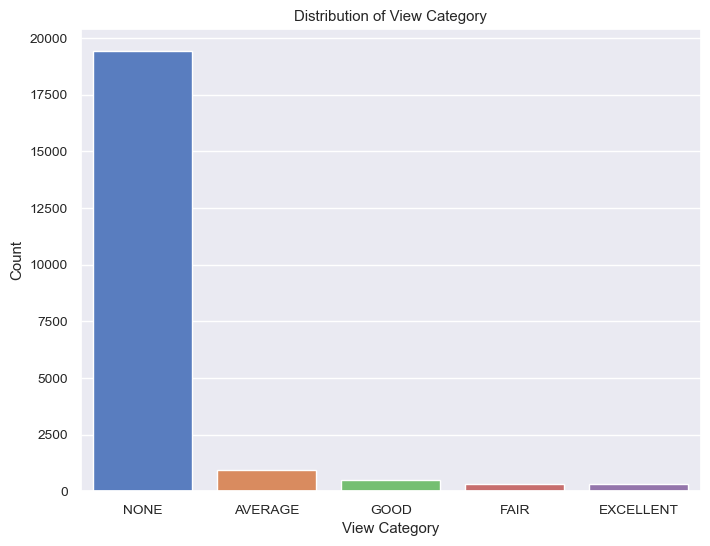

In [170]:
# Filter the DataFrame for missing values in 'view' column
view_counts = data['view'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=view_counts.index, y=view_counts.values)
plt.xlabel('View Category')
plt.ylabel('Count')
plt.title('Distribution of View Category')
plt.show()

In [171]:
# Calculate the percentage of "NONE" category in the 'view' column
none_percentage = (data['view'].value_counts()['NONE'] / len(data['view'])) * 100

# Print the percentage
print(f"The percentage of 'NONE' category in the 'view' column is: {none_percentage:.2f}%")


The percentage of 'NONE' category in the 'view' column is: 89.93%


Due to the high proportion (89.93%) of missing values in the 'view' column, it is dropped from further analysis to focus on more influential features for house price prediction.

In [172]:
# Drop the 'view' column
data.drop('view', axis=1, inplace=True)

In [173]:
sample = data['yr_renovated'].sample(n=5)
print(sample)

17069       0.0
16007       0.0
15678    1990.0
3136        0.0
15109       0.0
Name: yr_renovated, dtype: float64


In [174]:
# Filter for NaN values
nan_values = data[data['yr_renovated'].isna()]

# Filter for inf values
inf_values = data[data['yr_renovated'].isin([np.inf, -np.inf])]

# Filter for 0.0 values
zero_values = data[data['yr_renovated'] == 0.0]

# Print the counts and percentages of each category
print(f"NaN Values: {len(nan_values)} ({len(nan_values)/len(data)*100:.2f}%)")
print(f"Inf Values: {len(inf_values)} ({len(inf_values)/len(data)*100:.2f}%)")
print(f"0.0 Values: {len(zero_values)} ({len(zero_values)/len(data)*100:.2f}%)")


NaN Values: 3842 (17.79%)
Inf Values: 0 (0.00%)
0.0 Values: 17011 (78.77%)


Given this distribution, it is reasonable to assume that the houses with 'NaN' and 0.0 values in the 'yr_renovated' column have not been renovated. Converting the column to integer format allows for easier numerical analysis and comparison.

In [175]:
# Replace non-finite values with -1
data['yr_renovated'] = data['yr_renovated'].replace([np.inf, -np.inf, np.nan], -1)

# Cast 'yr_renovated' column to int
data['yr_renovated'] = data['yr_renovated'].astype(int)

# Replace -1 values with zero
data['yr_renovated'] = data['yr_renovated'].replace(-1, 0)


Examine categorical columns.

In [176]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Separate categorical variables from the dataset
categorical_data = data[categorical_columns]

# Create an empty dictionary to store the summaries
categorical_summaries = {}

# Iterate over the categorical columns
for column in categorical_columns:
    # Calculate the frequency distribution of the categorical variable
    category_counts = categorical_data[column].value_counts()
    
    # Store the summary in the dictionary
    categorical_summaries[column] = category_counts

# Print the summaries
for column, summary in categorical_summaries.items():
    print(f"Summary for {column}:")
    print(summary)
    print()

Summary for waterfront:
NO     21451
YES      146
Name: waterfront, dtype: int64

Summary for condition:
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Summary for grade:
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64



Implement one-hot encoding for the categorical variables

In [177]:
# Encode the 'waterfront' column
waterfront_encoded = pd.get_dummies(data['waterfront'], prefix='waterfront', drop_first=False)

# Encode the 'condition' column
condition_data = data['condition']

condition_encoded = pd.get_dummies(condition_data, prefix='condition')
# Drop one category as the reference (baseline) from domain knowledge
condition_encoded.drop('condition_Average', axis=1, inplace=True)

# Encode the 'grade' variable
grade_data = data['grade']

grade_encoded = pd.get_dummies(grade_data, prefix='grade')
# Drop one category as the reference (baseline) from domain knowledge
grade_encoded.drop('grade_7 Average', axis=1, inplace=True)

In [178]:
# View 4 random rows from the encoded DataFrame
random_rows = waterfront_encoded.sample(n=2, random_state=52)
random_rows2 = grade_encoded.sample(n=2, random_state=72)
random_rows3 = condition_encoded.sample(n=2, random_state=128)

# Print the random rows
print(f'waterfront_encoded:\n {random_rows}')
print(f'grade_encoded:\n {random_rows2}')
print(f'condition_encoded:\n {random_rows3}')

waterfront_encoded:
        waterfront_NO  waterfront_YES
3189               1               0
16967              1               0
grade_encoded:
       grade_10 Very Good  grade_11 Excellent  grade_12 Luxury  \
2681                   1                   0                0   
9782                   0                   0                0   

      grade_13 Mansion  grade_3 Poor  grade_4 Low  grade_5 Fair  \
2681                 0             0            0             0   
9782                 0             0            0             0   

      grade_6 Low Average  grade_8 Good  grade_9 Better  
2681                    0             0               0  
9782                    0             0               0  
condition_encoded:
        condition_Fair  condition_Good  condition_Poor  condition_Very Good
13274               0               0               0                    0
9834                0               1               0                    0


Drop the original categorical columns from our data and replace with encoded data for modeling. 

In [179]:
# Drop the original categorical columns
data.drop(['condition', 'grade', 'waterfront'], axis=1, inplace=True)

# Append the encoded data to the DataFrame
data = pd.concat([data, condition_encoded, grade_encoded, waterfront_encoded], axis=1)


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   price                21597 non-null  float64
 2   bedrooms             21597 non-null  int64  
 3   bathrooms            21597 non-null  float64
 4   sqft_living          21597 non-null  int64  
 5   sqft_lot             21597 non-null  int64  
 6   floors               21597 non-null  float64
 7   yr_built             21597 non-null  int64  
 8   yr_renovated         21597 non-null  int64  
 9   condition_Fair       21597 non-null  uint8  
 10  condition_Good       21597 non-null  uint8  
 11  condition_Poor       21597 non-null  uint8  
 12  condition_Very Good  21597 non-null  uint8  
 13  grade_10 Very Good   21597 non-null  uint8  
 14  grade_11 Excellent   21597 non-null  uint8  
 15  grade_12 Luxury      21597 non-null 

In [181]:
# Calculate the correlation coefficients
correlation_coeffs = data.drop('price', axis=1).corrwith(data['price'], numeric_only=True)

# Create a list of variable-correlation pairs
variable_correlation_list = [(variable, correlation_coeffs[variable]) for variable in correlation_coeffs.index]

# Sort the list by absolute correlation coefficient in descending order
sorted_variable_correlation_list = sorted(variable_correlation_list, key=lambda x: abs(x[1]), reverse=True)

# Display the list of variables and their correlation coefficients
print("List of variables and their correlation coefficients:")
for variable, correlation_coefficient in sorted_variable_correlation_list:
    print(f"{variable}: {correlation_coefficient}")


List of variables and their correlation coefficients:
sqft_living: 0.7019173021377595
bathrooms: 0.5259056214532012
grade_11 Excellent: 0.3575892455895603
grade_10 Very Good: 0.34094444392527873
bedrooms: 0.3087874719565328
grade_12 Luxury: 0.2910684056600212
waterfront_NO: -0.2643062804831157
waterfront_YES: 0.2643062804831157
floors: 0.2568035370080218
grade_9 Better: 0.23585862861225393
grade_13 Mansion: 0.21180601401782584
grade_6 Low Average: -0.2094629194400604
yr_renovated: 0.11785522779076014
sqft_lot: 0.08987622099083864
grade_5 Fair: -0.0845494855347592
condition_Very Good: 0.05753114315733805
yr_built: 0.05395333346519117
condition_Fair: -0.05143153488649203
grade_4 Low: -0.03161762723420142
condition_Good: -0.030758584389126056
condition_Poor: -0.01988638787183236
id: -0.01677184761297261
grade_3 Poor: -0.005155013001669548
grade_8 Good: 0.004576138101112029


Identify the variable with the highest absolute correlation with the price from the list.

In [182]:
# Get the variable with the highest absolute correlation
most_influential_variable = sorted_variable_correlation_list[0]

print(f"The variable with the highest correlation to price is: {most_influential_variable}")


The variable with the highest correlation to price is: ('sqft_living', 0.7019173021377595)


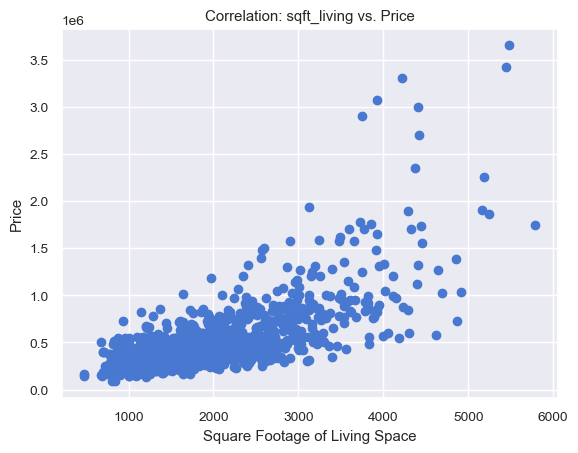

In [183]:
# Set a random seed for reproducibility
np.random.seed(526)

# Randomly sample the data
sample_data = data.sample(n=1000)  # Adjust the sample size as desired

# Extract the variables of interest
sqft_living = sample_data['sqft_living']
price = sample_data['price']

# Create a scatter plot
plt.scatter(sqft_living, price)
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.title('Correlation: sqft_living vs. Price')
plt.show()

'sqft_living' is selected for the base model because of its intuitive relevance to house value and its strong correlation with the price.

Creating and Fitting Simple Linear Regression.

In [184]:
def build_linear_regression_model(X, y):
    """Build a simple linear regression model using the given features and target variables."""
    X = sm.add_constant(X)  # Add a constant column to the feature matrix
    model = sm.OLS(y, X)
    return model

def train_model(model):
    """Train the linear regression model."""
    return model.fit()

def get_model_summary(model_result):
    """Get the summary of the trained linear regression model."""
    return model_result.summary()

In [185]:
X = data[['sqft_living']]  # Input features
y = data['price']          # Target variable

model = build_linear_regression_model(X, y)
trained_model = train_model(model)
summary = get_model_summary(trained_model)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:42:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

R-squared is a measure of how well the linear regression model fits the data. It ranges from 0 to 1, where 1 indicates a perfect fit.  In this case, R-squared is 0.493.

Adjusted R-squared takes into account the number of predictors in the model. It penalizes the addition of unnecessary variables and provides a better measure of the model's goodness of fit.

In [186]:
def get_model_mae(model, X, y):
    """Get the mean absolute error (MAE) for the trained linear regression model."""
    X = sm.add_constant(X)  # Add a constant column to the feature matrix
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    return mae

In [187]:
mae = get_model_mae(trained_model, X, y)
print("Mean Absolute Error for our base model:", mae)

Mean Absolute Error for our base model: 173824.88749617475


R-squared value is 0.493, which means that approximately 49.3% of the variability in the target variable (price) can be explained by the model. The remaining 50.7% of the variability is unexplained.

The coefficients represent the estimated effect of each predictor variable on the target variable. 

In this model, there are two coefficients:

The intercept is -4.399e+04, indicating the estimated price when the sqft_living is 0.
The coefficient for sqft_living is 280.8630, suggesting that, on average, for each additional square foot of living space, the price increases by $280.8630.

Mean absolute error (MAE) of 173824.89 represents the average absolute difference between the predicted prices and the true prices for the base model. This can serve as a measure of how well the model predicts the target variable. Lower MAE values indicate better predictive performance.

Iteratively add more predictor variables and analyse.

In [188]:
X = data[['sqft_living', 'bathrooms', 'floors']]  # Add 'bathroom', 'floors' to Input features
y = data['price']                        # Target variable

model = build_linear_regression_model(X, y)
trained_model = train_model(model)
summary = get_model_summary(trained_model)
print(summary)
mae = get_model_mae(trained_model, X, y)
print("Mean Absolute Error when we add 'bathroom', 'floors' to predictor variables is:", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     6996.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:42:26   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.002e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.739e+04   5976.025     -7.931      

The adjusted R-squared when we add 'bathroom' and 'floors' to predictor variables is still 0.493, meaning that the addition of the 'bathrooms' and 'floors' features did not significantly improve the overall fit of the model.

The estimated price when both 'sqft_living', 'bathrooms' and 'floors' are 0 is -4.739e+04.

The mean absolute error (MAE) for this updated model is 173576.66. Comparing this value with the previous model's MAE (173824.89), we observe that the difference is minimal. This suggests that adding the 'bathrooms' feature did not have a substantial impact on the predictive performance of the model.

Drop the X variables and try 'bedrooms' because their presence is not significant.

In [189]:
data = data.drop(['bathrooms', 'floors'], axis=1)


In [190]:
X = data[['sqft_living', 'bedrooms']]  # Add 'bedroom' to Input features
y = data['price']                        # Target variable

model = build_linear_regression_model(X, y)
trained_model = train_model(model)
summary = get_model_summary(trained_model)
print(summary)
mae = get_model_mae(trained_model, X, y)
print("Mean Absolute Eroor when we add 'bedrooms'to predictor variables is:", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:42:27   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.091e+04   6638.826     12.187      

The R-squared value is 0.507, comparing these value with the previous models, we can see a slight improvement in the explanatory power of the model.
The coefficient for 'bedrooms' is -5.783e+04, indicating that, on average, each additional bedroom is associated with a decrease of $57,830 in the price.
All coefficients have t-values with p-values less than 0.05, indicating that they are statistically significant in predicting the price.

The mean absolute error (MAE) for this updated model is 170382.45. Comparing this value with the previous models' MAEs, we observe a lower MAE, indicating better predictive performance.

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   price                21597 non-null  float64
 2   bedrooms             21597 non-null  int64  
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   yr_built             21597 non-null  int64  
 6   yr_renovated         21597 non-null  int64  
 7   condition_Fair       21597 non-null  uint8  
 8   condition_Good       21597 non-null  uint8  
 9   condition_Poor       21597 non-null  uint8  
 10  condition_Very Good  21597 non-null  uint8  
 11  grade_10 Very Good   21597 non-null  uint8  
 12  grade_11 Excellent   21597 non-null  uint8  
 13  grade_12 Luxury      21597 non-null  uint8  
 14  grade_13 Mansion     21597 non-null  uint8  
 15  grade_3 Poor         21597 non-null 

# Visualize average price of houses over time.

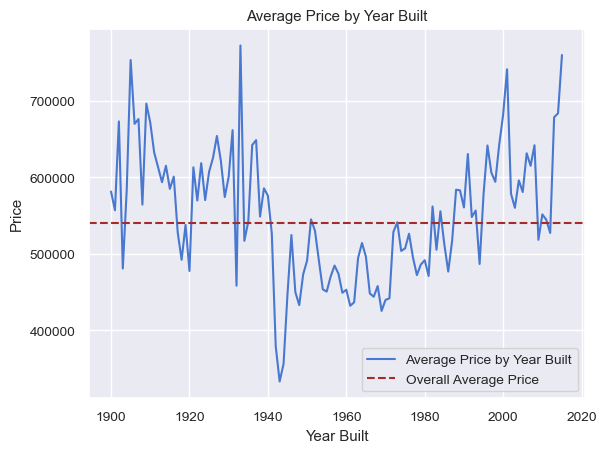

In [196]:
# Calculate the overall average price
overall_avg_price = data['price'].mean()

# Calculate the average price by year builtyr_built
avg_price_by_year = data.groupby('yr_built')['price'].mean()

# Plot the average price over time
plt.plot(avg_price_by_year.index, avg_price_by_year.values, label='Average Price by Year Built')

# Plot the overall average price as a reference line
plt.axhline(overall_avg_price, color='brown', linestyle='--', label='Overall Average Price')

plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Average Price by Year Built')
plt.legend()
plt.show()

In [198]:
X = data[['sqft_living', 'bedrooms', 'yr_built']]  # Analyse the impact of adding year built to Input features
y = data['price']                        # Target variable

model = build_linear_regression_model(X, y)
trained_model = train_model(model)
summary = get_model_summary(trained_model)
print(summary)
mae = get_model_mae(trained_model, X, y)
print("Mean Absolute Eroor when we add 'yr_built'to predictor variables is:", mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     8462.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:53:48   Log-Likelihood:            -2.9900e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21593   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.801e+06   1.19e+05     40.313      

In [ ]:
# More data cleaning procedures


## 6. Exploratory Analysis
Feature engineering: Consider which features might have a significant impact on house prices based on domain knowledge and exploratory data analysis. Create new features or transform existing ones to capture meaningful information. For example, you might create dummy variables for categorical features like "waterfront" or "view" to assess their influence on house prices.

In [ ]:
# Ploting the bivariate summaries and recording our observations
#

In [ ]:
# Data Reduction
#

Model building and evaluation: Start with a basic linear regression model using the identified influential features and the target variable (house price). Evaluate the model's performance using metrics such as R-squared, mean squared error (MSE), or root mean squared error (RMSE). Assess the significance of the coefficients for each feature and interpret their implications.

## 7. Implementing the Solution
Iterate and refine the models: Based on the evaluation results, make iterative improvements to the model. You can try different variable transformations, feature selections, or consider interactions between variables. Evaluate each model, compare their performance, and document the changes you made and the reasoning behind them.

In [ ]:
# Implementing the Solution
# 

Final model selection and interpretation: Select the final model based on its performance, interpretability, and alignment with the business problem. Discuss the findings and insights obtained from the final model, focusing on the most influential features and their impact on house prices. Provide actionable recommendations for the real estate agency to prioritize and emphasize these features in their advice to homeowners and buyers.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?